In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
import numpy.random as rnd
import statsmodels.api as sm

# Data Analysis and Visualization

In [150]:
df = pd.read_excel(r'C:\Users\hp\OneDrive\Desktop\f\\Cardatanew.xlsx')
df.head(5)

,Listing date,Brand,sherry,model,year,fuel,gear,km,case type,color,price,status
0,"March 12, 2022",Renault,talisman,1.6 dCi Icon,2016,diesel,Semi-automatic,106300,sedan,smoked,417500,2
1,2022-03-28 00:00:00,Chevrolet,Captiva,2.0 D LT High,2011,diesel,Semi-automatic,227500,SUV,white,219500,1
2,2022-03-28 00:00:00,Volkswagen,Amarok,2.0 Bi-TDI Highline,2013,diesel,Automatic,150000,Pickup,Black,359000,1
3,2022-03-28 00:00:00,Volkswagen,Amarok,2.0 Bi-TDI Highline,2017,diesel,Manual,115000,Pickup,gray,505000,1
4,"March 30, 2022",Dacia,duster,1.5 dCi Laureate,2016,diesel,Manual,60300,SUV,smoked,310000,2


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Listing date   199 non-null    object
 1   Brand          199 non-null    object
 2   sherry         199 non-null    object
 3   model          198 non-null    object
 4   year           199 non-null    int64 
 5   fuel           199 non-null    object
 6   gear           199 non-null    object
 7   km             199 non-null    int64 
 8   case type      199 non-null    object
 9   color          199 non-null    object
 10  price          199 non-null    object
 11  status         199 non-null    int64 
dtypes: int64(3), object(9)
memory usage: 18.8+ KB


In [152]:
df.describe()

,year,km,status
count,199.000000,1.990000e+02,199.000000
mean,2013.180905,2.240937e+05,1.437186
std,5.460366,3.317673e+05,0.497290
min,1990.000000,0.000000e+00,1.000000
25%,2011.000000,5.250000e+04,1.000000
50%,2014.000000,1.325000e+05,1.000000
75%,2017.000000,2.345000e+05,2.000000
max,2022.000000,1.800000e+06,2.000000


In [153]:
df.columns

Index(['Listing date ', 'Brand', 'sherry', 'model', 'year', 'fuel', 'gear',
       'km', 'case type', 'color', 'price', 'status'],
      dtype='object')

In [154]:
df.shape

(199, 12)

In [155]:
cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]
print("Columns with missing values:")
print(cols_with_missing)

Columns with missing values:
['model']


In [156]:
def get_null_count(df):
    for i in df.columns: 
        print(i,':',len(df[df[i].isnull()][i]))

In [157]:
get_null_count(df)

Listing date  : 0
Brand : 0
sherry : 0
model : 1
year : 0
fuel : 0
gear : 0
km : 0
case type : 0
color : 0
price : 0
status : 0


Total Missing:  1


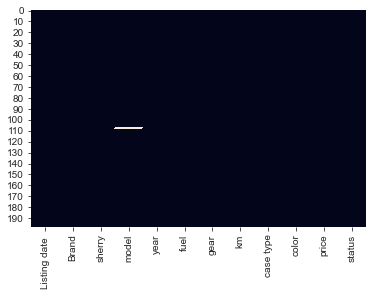

In [158]:
sns.heatmap(df.isnull(), cbar=False)
print("Total Missing: ", df.isna().sum().values.sum())

In [159]:
df['model'].dropna()

0             1.6 dCi Icon 
1            2.0 D LT High 
2      2.0 Bi-TDI Highline 
3      2.0 Bi-TDI Highline 
4         1.5 dCi Laureate 
               ...         
194                       2
195                   320i 
196              Exclusive 
197                    2.0T
198               2.0 TFSI 
Name: model, Length: 198, dtype: object

In [160]:
df['price'] = df['price'].astype('int64')

In [161]:
df['sherry'] = df['sherry'].astype(str)

In [162]:
df['model']= df['model'].astype(str)

In [163]:
df['fuel']= df['fuel'].astype(str)

In [164]:
df['case type']= df['case type'].astype(str)

In [165]:
df['caseType']= df['case type']

In [166]:
del df['case type']

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Listing date   199 non-null    object
 1   Brand          199 non-null    object
 2   sherry         199 non-null    object
 3   model          199 non-null    object
 4   year           199 non-null    int64 
 5   fuel           199 non-null    object
 6   gear           199 non-null    object
 7   km             199 non-null    int64 
 8   color          199 non-null    object
 9   price          199 non-null    int64 
 10  status         199 non-null    int64 
 11  caseType       199 non-null    object
dtypes: int64(4), object(8)
memory usage: 18.8+ KB


In [168]:
df.describe()

,year,km,price,status
count,199.000000,1.990000e+02,199.000000,199.000000
mean,2013.180905,2.240937e+05,412131.100503,1.437186
std,5.460366,3.317673e+05,254415.417766,0.497290
min,1990.000000,0.000000e+00,18500.000000,1.000000
25%,2011.000000,5.250000e+04,213750.000000,1.000000
50%,2014.000000,1.325000e+05,362000.000000,1.000000
75%,2017.000000,2.345000e+05,599750.000000,2.000000
max,2022.000000,1.800000e+06,975000.000000,2.000000


In [169]:
df.columns

Index(['Listing date ', 'Brand', 'sherry', 'model', 'year', 'fuel', 'gear',
       'km', 'color', 'price', 'status', 'caseType'],
      dtype='object')

In [170]:
df. columns

Index(['Listing date ', 'Brand', 'sherry', 'model', 'year', 'fuel', 'gear',
       'km', 'color', 'price', 'status', 'caseType'],
      dtype='object')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Listing date   199 non-null    object
 1   Brand          199 non-null    object
 2   sherry         199 non-null    object
 3   model          199 non-null    object
 4   year           199 non-null    int64 
 5   fuel           199 non-null    object
 6   gear           199 non-null    object
 7   km             199 non-null    int64 
 8   color          199 non-null    object
 9   price          199 non-null    int64 
 10  status         199 non-null    int64 
 11  caseType       199 non-null    object
dtypes: int64(4), object(8)
memory usage: 18.8+ KB


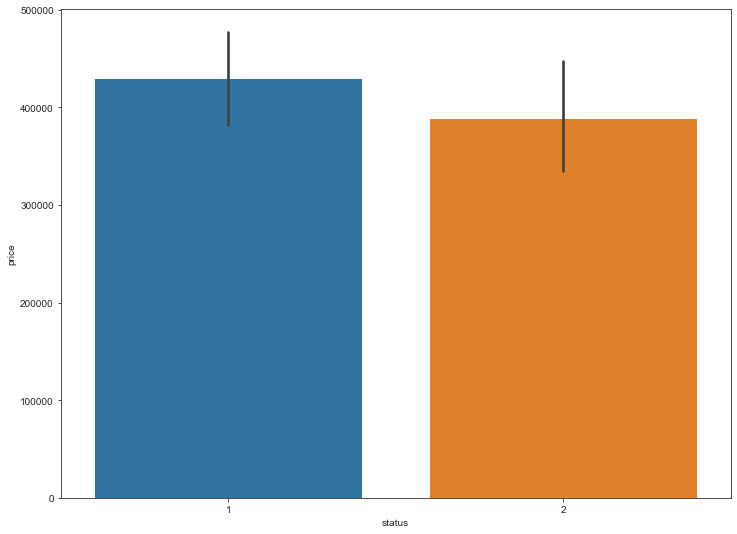

In [172]:
plt.figure(figsize=(12, 9))
sns.barplot('status', 'price', data=df)

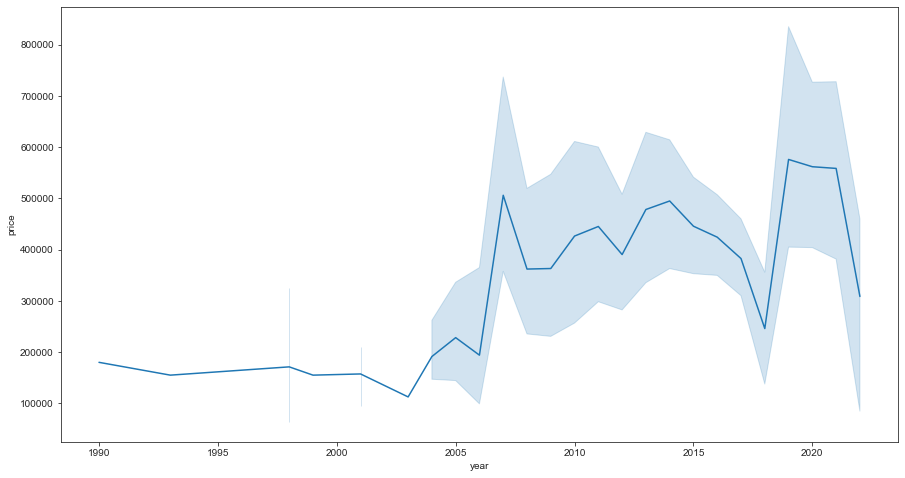

In [173]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'year', y = 'price',data = df)

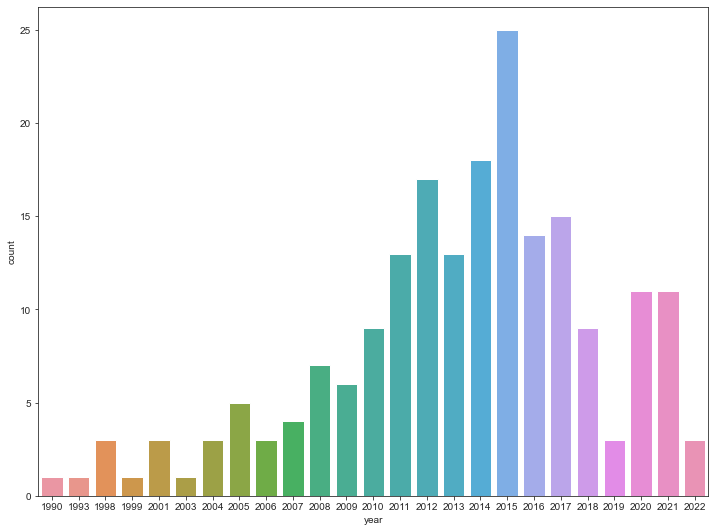

In [174]:
plt.figure(figsize=(12, 9))
sns.countplot('year', data=df
             )

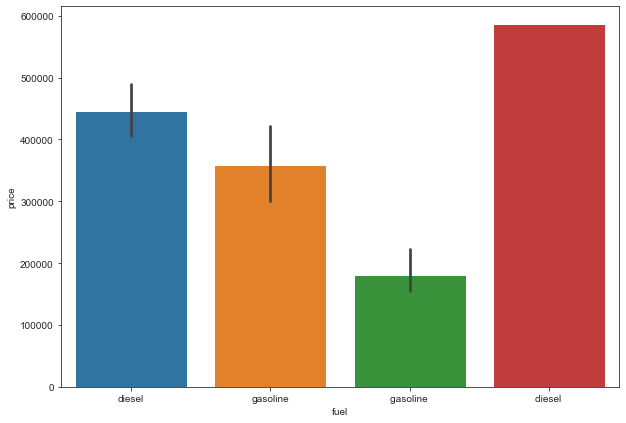

In [175]:
plt.figure(figsize=(10, 7))
sns.barplot('fuel', 'price', data=df)

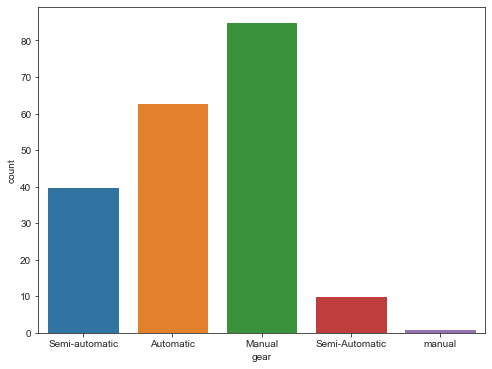

In [176]:
plt.figure(figsize=(8, 6))
sns.countplot('gear', data=df)

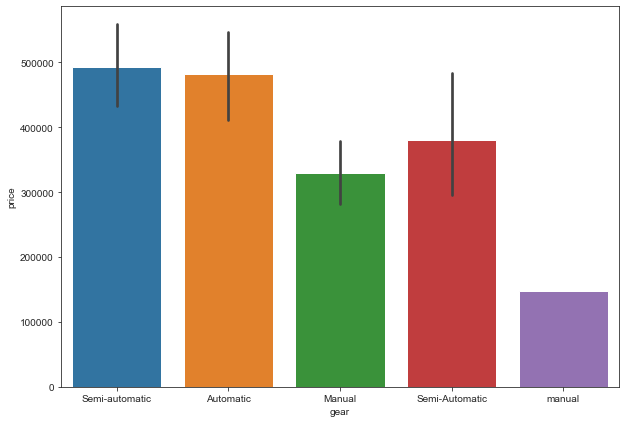

In [177]:
plt.figure(figsize=(10, 7))
sns.barplot('gear', 'price', data=df)

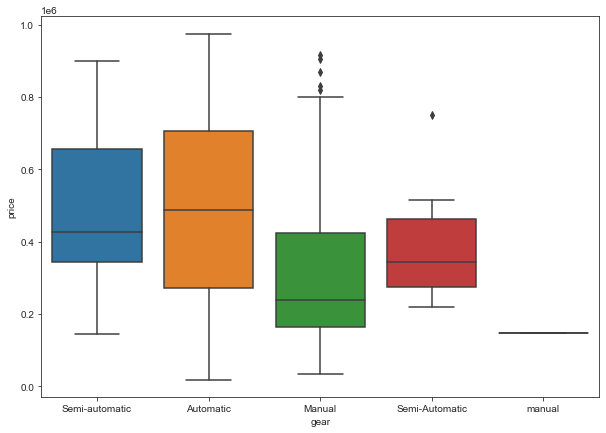

In [178]:
plt.figure(figsize=(10, 7))
sns.boxplot('gear', 'price', data=df)

In [179]:
df.columns

Index(['Listing date ', 'Brand', 'sherry', 'model', 'year', 'fuel', 'gear',
       'km', 'color', 'price', 'status', 'caseType'],
      dtype='object')

# Preprocessing

In [180]:
from sklearn.preprocessing import LabelEncoder

In [181]:
Brand1 = LabelEncoder()

In [182]:
df['Brand'] = Brand1.fit_transform(df.Brand)

In [183]:
df.head()

,Listing date,Brand,sherry,model,year,fuel,gear,km,color,price,status,caseType
0,"March 12, 2022",33,talisman,1.6 dCi Icon,2016,diesel,Semi-automatic,106300,smoked,417500,2,sedan
1,2022-03-28 00:00:00,6,Captiva,2.0 D LT High,2011,diesel,Semi-automatic,227500,white,219500,1,SUV
2,2022-03-28 00:00:00,45,Amarok,2.0 Bi-TDI Highline,2013,diesel,Automatic,150000,Black,359000,1,Pickup
3,2022-03-28 00:00:00,45,Amarok,2.0 Bi-TDI Highline,2017,diesel,Manual,115000,gray,505000,1,Pickup
4,"March 30, 2022",8,duster,1.5 dCi Laureate,2016,diesel,Manual,60300,smoked,310000,2,SUV


In [184]:
Sherry1 = LabelEncoder()

In [185]:
df['sherry']=Sherry1.fit_transform(df.sherry)

In [186]:
fuel1=LabelEncoder()

In [187]:
df['fuel']=fuel1.fit_transform(df.fuel)

In [188]:
gear1=LabelEncoder()

In [189]:
df['gear']=gear1.fit_transform(df.gear)

In [190]:
df.head()

,Listing date,Brand,sherry,model,year,fuel,gear,km,color,price,status,caseType
0,"March 12, 2022",33,112,1.6 dCi Icon,2016,0,3,106300,smoked,417500,2,sedan
1,2022-03-28 00:00:00,6,17,2.0 D LT High,2011,0,3,227500,white,219500,1,SUV
2,2022-03-28 00:00:00,45,8,2.0 Bi-TDI Highline,2013,0,0,150000,Black,359000,1,Pickup
3,2022-03-28 00:00:00,45,8,2.0 Bi-TDI Highline,2017,0,1,115000,gray,505000,1,Pickup
4,"March 30, 2022",8,90,1.5 dCi Laureate,2016,0,1,60300,smoked,310000,2,SUV


In [191]:
year1=LabelEncoder()

In [192]:
case_type1=LabelEncoder()

In [193]:
df.head()

,Listing date,Brand,sherry,model,year,fuel,gear,km,color,price,status,caseType
0,"March 12, 2022",33,112,1.6 dCi Icon,2016,0,3,106300,smoked,417500,2,sedan
1,2022-03-28 00:00:00,6,17,2.0 D LT High,2011,0,3,227500,white,219500,1,SUV
2,2022-03-28 00:00:00,45,8,2.0 Bi-TDI Highline,2013,0,0,150000,Black,359000,1,Pickup
3,2022-03-28 00:00:00,45,8,2.0 Bi-TDI Highline,2017,0,1,115000,gray,505000,1,Pickup
4,"March 30, 2022",8,90,1.5 dCi Laureate,2016,0,1,60300,smoked,310000,2,SUV


In [194]:
df['caseType']=case_type1.fit_transform(df.caseType)

In [195]:
df.head()

,Listing date,Brand,sherry,model,year,fuel,gear,km,color,price,status,caseType
0,"March 12, 2022",33,112,1.6 dCi Icon,2016,0,3,106300,smoked,417500,2,20
1,2022-03-28 00:00:00,6,17,2.0 D LT High,2011,0,3,227500,white,219500,1,8
2,2022-03-28 00:00:00,45,8,2.0 Bi-TDI Highline,2013,0,0,150000,Black,359000,1,7
3,2022-03-28 00:00:00,45,8,2.0 Bi-TDI Highline,2017,0,1,115000,gray,505000,1,7
4,"March 30, 2022",8,90,1.5 dCi Laureate,2016,0,1,60300,smoked,310000,2,8


In [196]:
color1=LabelEncoder()

In [197]:
df['color']=color1.fit_transform(df.color)

In [198]:
#status1=LabelEncoder()

In [199]:
#df['status']=status1.fit_transform(df.status)

In [200]:
model1=LabelEncoder()

In [201]:
df['model']=status1.fit_transform(df.model)

In [202]:
df.head()

,Listing date,Brand,sherry,model,year,fuel,gear,km,color,price,status,caseType
0,"March 12, 2022",33,112,53,2016,0,3,106300,20,417500,2,20
1,2022-03-28 00:00:00,6,17,67,2011,0,3,227500,21,219500,1,8
2,2022-03-28 00:00:00,45,8,65,2013,0,0,150000,0,359000,1,7
3,2022-03-28 00:00:00,45,8,65,2017,0,1,115000,14,505000,1,7
4,"March 30, 2022",8,90,23,2016,0,1,60300,20,310000,2,8


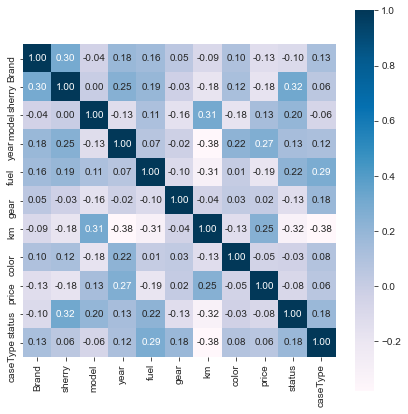

In [203]:
Corrmat = df.corr()
plt.subplots(figsize=(7,7))
sns.heatmap(Corrmat, cmap="PuBu", square = True, annot=True, fmt='.2f')
plt.show()

In [205]:
df.columns

Index(['Listing date ', 'Brand', 'sherry', 'model', 'year', 'fuel', 'gear',
       'km', 'color', 'price', 'status', 'caseType'],
      dtype='object')

In [207]:
df2 = df[['Brand', 'sherry', 'model', 'year', 'fuel', 'gear',
       'km', 'color', 'price', 'status', 'caseType']]

In [208]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit and transform the data
scaled_data = scaler.fit_transform(df2)

# Modelling

In [218]:
x = df2.drop(['price'],axis = 1).values
y = df2["price"].values

In [243]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15, random_state = 40)

In [244]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)

In [245]:
print("Accuracy on Traing set: ",lr.score(x_train,y_train))
print("Accuracy on Testing set: ",lr.score(x_test,y_test))

Accuracy on Traing set:  0.3285356625891739
Accuracy on Testing set:  0.30419193309770554


In [246]:
100*x_test.shape[0]/x_train.shape[0]

17.75147928994083

In [247]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr.score(x_test, y_test))

Variance score: 0.30


In [248]:
test_residuals = y_test - y_predict
test_residuals

array([-195329.75464419,  119763.49784068,   86822.77161627,
       -440234.45161235,  374856.48213081,  333886.98317674,
       -168947.07588083, -219909.62348618, -267115.99418325,
         13470.1611126 ,   13374.5049812 ,   21455.67592686,
       -145808.61349667, -313927.49192428, -198208.75294931,
       -119140.89668085,  -30054.5834247 ,    3392.41401161,
       -103560.89580593, -263249.9534713 ,  -59364.38289082,
        -36754.59752847,  -84810.62748523, -181907.82086403,
       -151632.78535929,   62584.63304834,  318647.38151381,
         18960.89443851,  369241.10480008,  428735.27480627])

In [249]:
# The mean squared error
print("Mean squared error: %.2f" % np.mean((lr.predict(x_test) - y_test) ** 2))

Mean squared error: 46775426249.34


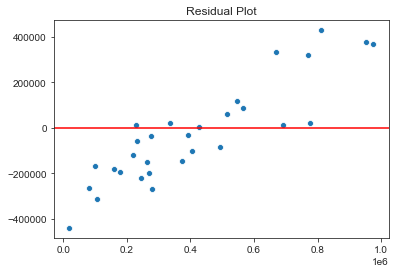

In [250]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red')
plt.title('Residual Plot');

In [251]:
from sklearn.ensemble import RandomForestRegressor


In [252]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
y_predict = rf_reg.predict(x_test)

In [253]:
print("Accuracy on Traing set: ",rf_reg.score(x_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(x_test,y_test))

Accuracy on Traing set:  0.9495518890982088
Accuracy on Testing set:  0.5458773032656389


In [254]:
100*x_test.shape[0]/x_train.shape[0]

17.75147928994083

In [255]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % rf_reg.score(x_test, y_test))

Variance score: 0.55


In [256]:
test_residuals = y_test - y_predict
test_residuals

array([ -14205.  ,   25117.  ,  103313.5 , -387691.5 ,  227186.5 ,
        224611.  , -204110.  , -308185.39,  -85140.  ,   42619.5 ,
       -103238.  ,  -47413.  , -159857.39,  -21037.5 ,  -50825.  ,
       -133047.  , -192545.  ,  -33474.5 , -204898.5 , -270303.5 ,
        -48991.5 ,  -11324.  ,  123970.  ,  -77628.  ,  -94311.5 ,
        149000.  ,  -66360.  ,  164037.5 ,  444016.  ,  101771.  ])

In [257]:
# The mean squared error
print("Mean squared error: %.2f" % np.mean((rf_reg.predict(x_test) - y_test) ** 2))

Mean squared error: 30528221386.99


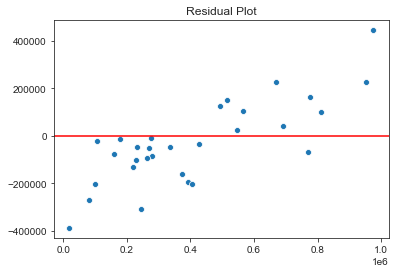

In [258]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red')
plt.title('Residual Plot');